# <center><font color='darkblue'>Analyzing the Facebook Data</font><center>


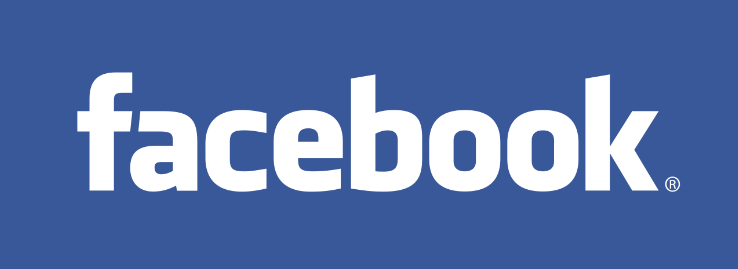

Here in this notebook, I have analyzed the Play House Communication Facebook data to derive valuable insights that can help to make data-driven business decisions. Grab a coke bottle and a snack as I take you on this adventrous ride. 

### Importing Packages

There are some packages that are really important in for data exploration and machine learning, this section shows the packages used for this project

In [127]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, CatBoostRegressor
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import os

### Importing data

The facebook data in csv format was read in with the pandas package

In [128]:
fb = pd.read_csv(r'..\..\original_datasets\Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Facebook.csv',low_memory = False, thousands = ',',float_precision = 'legacy')

In [129]:
#making a copy
fb_copy = fb.copy()

### Exploratory data analysis 1

I have splitted my exploration into two phases. This first phase shows the analysis and derivation of basic information from the data.


In [130]:
#deriving shape of file
fb.shape

(9803, 147)

In [131]:
#deriving more information about file size, number of columns etc
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9803 entries, 0 to 9802
Columns: 147 entries, Date to Tags
dtypes: float64(133), object(14)
memory usage: 11.0+ MB


In [132]:
#printing total number of columns
print('Total number of columns :',fb.shape[1])

Total number of columns : 147


In [133]:
#printing total number of rows
print('Total number of rows :',fb.shape[0])

Total number of rows : 9803


In [134]:
#identifying number of columns that are numeric
number_of_numeric_columns =  len(fb.select_dtypes('number').columns.to_list())
number_of_numeric_columns

133

In [135]:
#identifying number of columns that are non-numeric
number_of_non_numeric_columns =  len(fb.select_dtypes('object').columns.to_list())
number_of_non_numeric_columns

14

In [136]:
#identifying colummns percentage of null values present
null_values_percent = fb.isna().sum()/fb.shape[0] * 100
null_values_percent

Date                                             0.000000
Post ID                                          0.000000
Network                                          0.000000
Post Type                                        0.000000
Content Type                                     0.000000
Profile                                          0.000000
Sent by                                          0.000000
Link                                             0.000000
Post                                             2.550240
Linked Content                                   3.478527
Impressions                                      9.282873
Organic Impressions                              9.282873
Viral Impressions                                9.282873
Non-viral Impressions                            9.282873
Paid Impressions                                 9.282873
Fan Impressions                                  9.282873
Fan Organic Impressions                          9.282873
Fan Paid Impre

In [137]:
(fb.isna().sum()/fb.shape[0] * 100)[(fb.isna().sum()/fb.shape[0] * 100) > 50]

Potential Reach                                100.000000
Dislikes                                       100.000000
Saves                                          100.000000
Post Link Clicks                                82.260532
Post Media Clicks                              100.000000
Post Hashtag Clicks                            100.000000
Post Detail Expand Clicks                      100.000000
Profile Clicks                                 100.000000
Post Video Play Clicks                          90.574314
Other Engagements                              100.000000
App Engagements                                100.000000
App Install Attempts                           100.000000
App Opens                                      100.000000
Follows from Post                              100.000000
Unfollows from Post                            100.000000
bit.ly Link Clicks                             100.000000
Unique Post Link Clicks                         82.260532
Unique Post Vi

In [138]:
#identifying duplicated values
fb.duplicated().any()

False

In [139]:
#taking a statistical overview of columns
fb.describe()

,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Paid Impressions,Fan Impressions,Fan Organic Impressions,Fan Paid Impressions,Non-fan Impressions,Non-fan Organic Impressions,Non-fan Paid Impressions,Reach,Organic Reach,Viral Reach,Non-viral Reach,Paid Reach,Fan Reach,Fan Paid Reach,Potential Reach,Engagements,Reactions,Likes,Dislikes,Love Reactions,Haha Reactions,Wow Reactions,Sad Reactions,Angry Reactions,Comments,Shares,Saves,Post Link Clicks,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Post Photo View Clicks,Post Video Play Clicks,Other Engagements,Answers,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Negative Feedback,bit.ly Link Clicks,Engaged Users,Engaged Fans,Users Talking About This,Unique Reactions,Unique Comments,Unique Shares,Unique Answers,Unique Post Clicks,Unique Post Link Clicks,Unique Post Photo View Clicks,Unique Post Video Play Clicks,Unique Other Post Clicks,Unique Negative Feedback,Subscribers Gained from Video,Annotation Clicks,Card Clicks,Video Views,Media Views,Organic Video Views,Paid Video Views,Partial Video Views,Organic Partial Video Views,Paid Partial Video Views,Full Video Views,Full Video View Rate,Follow Video Views,For You Video Views,Hashtag Video Views,Business Account Video Views,Sound Video Views,Unspecified Video Views,Organic Full Video Views,Paid Full Video Views,Autoplay Video Views,Click to Play Video Views,Sound on Video Views,Sound off Video Views,10-Second Video Views,Organic 10-Second Video Views,Paid 10-Second Video Views,Autoplay 10-Second Video Views,Click to Play 10-Second Video Views,Sound on 10-Second Video Views,Sound off 10-Second Video Views,Autoplay Partial Video Views,Click to Play Partial Video Views,Autoplay Full Video Views,Click to Play Full Video Views,95% Video Views,Organic 95% Video Views,Paid 95% Video Views,Video Length (Seconds),Average Video Time Watched (Seconds),Video View Time (Seconds),Organic Video View Time (Seconds),Paid Video View Time (Seconds),Unique Video Views,Unique Organic Video Views,Unique Paid Video Views,Unique 10-Second Video Views,Unique Full Video Views,Unique Organic 95% Video Views,Unique Paid 95% Video Views,Video Ad Break Ad Impressions,Video Ad Break Ad Earnings,Video Ad Break Ad Cost per Impression (CPM),YouTube Premium Views,Estimated Minutes Watched,Estimated Premium Minutes Watched,Story Taps Back,Story Taps Forward,Story Exits,Story Replies,Video Added to Playlists,Subscribers Lost from Video,Video Removed from Playlists,Annotation Impressions,Annotation Clickable Impressions,Annotation Closable Impressions,Annotation Closes,Card Impressions,Card Teaser Impressions,Card Teaser Clicks,Poll Votes
count,8893.000000,8893.000000,8893.000000,8893.000000,8893.0,8893.000000,8893.000000,8893.0,8893.000000,8893.000000,8893.0,8893.000000,8893.000000,8893.000000,8893.000000,8893.0,8893.000000,8893.0,0.0,8893.000000,8893.00000,8893.000000,0.0,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,0.0,1739.000000,8893.000000,8893.000000,0.0,0.0,0.0,0.0,7681.000000,924.000000,0.0,8893.000000,0.0,0.0,0.0,0.0,0.0,8893.000000,0.0,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,1739.000000,7681.000000,924.000000,8893.000000,8893.000000,0.0,0.0,0.0,922.000000,0.0,922.000000,922.000000,922.000000,922.000000,922.000000,927.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,927.000000,922.000000,927.000000,927.000000,927.000000,922.000000,927.000000,927.000000,922.000000,927.000000,927.000000,927.000000,927.000000,927.000000,922.0,927.000000,926.000000,927.000000,927.000000,922.000000,922.000000,922.000000,9.270000e+02,9.270000e+02,922.000000,927.000000,927.000000,922.000000,927.000000,927.000000,927.000000,922.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,5857.725177,5794.522996,623.155066,5234.547959,0.0,491

In [140]:
#checking unique values in columns like Network, post type, content type, profile, tags

In [141]:
fb['Network'].unique()

array(['Facebook'], dtype=object)

In [142]:
fb['Post Type'].unique()

array(['Post'], dtype=object)

In [143]:
fb['Content Type'].unique()

array(['Video', 'Photo', 'Text', 'Link'], dtype=object)

In [144]:
fb['Profile'].unique()

array(['Stanbic IBTC'], dtype=object)

In [145]:
#checking 10 random unique tags 
fb['Tags'].unique()[:10]

array(['CIB Posts', nan, 'CHNW Mass Retail', 'Pension Loyalty Campaign',
       'Insurance Brokers Posts, Weekly Wealth Posts',
       'CHNW Mass Retail, Reward4Saving',
       'Insurance Brokers Posts, Stay IN Business Campaign, Weekly Wealth Posts',
       'Trustees Posts, Weekly Wealth Posts',
       'Asset Management, Weekly Wealth Posts', 'BCC'], dtype=object)

### Exploratory Data Analysis 2

In this phase 2 of the exploratory data analysis, i performed more exploration and cleaned the data. In this section, I used the groupby method in pandas and also made a lot of visualizations 

#### Data Cleaning and Analysis

In [146]:
fb['Engagement Rate (per Impression)'].head()

0    0.49%
1    4.67%
2    5.29%
3    0.56%
4    6.16%
Name: Engagement Rate (per Impression), dtype: object

The column above has % sign in its values which is not good for python. Usually the % sign has to be removed. A number of columns in this dataset have the % sign and they need to be removed. The below code identifies and removes them

In [147]:
# Identify columns with 'rate' in the column name
rate_columns = [col for col in fb.columns if r'Rate' in col]

# Remove percent signs and convert to numeric
for col in rate_columns:
    fb[col] = fb[col].astype(str).str.rstrip('%')
    fb[col] = fb[col].str.replace(',','').astype(float)


Next was to identify columns that have zero missing values and they are shown belowm

In [148]:
null_values_percent[null_values_percent == 0]

Date            0.0
Post ID         0.0
Network         0.0
Post Type       0.0
Content Type    0.0
Profile         0.0
Sent by         0.0
Link            0.0
dtype: float64

Also, columns that contain exactly 100% null values were also identified and removed from the entire dataset since they had no meaningful information

In [149]:
totally_null_columns = null_values_percent[null_values_percent == 100].index.to_list()
totally_null_columns

['Potential Reach',
 'Dislikes',
 'Saves',
 'Post Media Clicks',
 'Post Hashtag Clicks',
 'Post Detail Expand Clicks',
 'Profile Clicks',
 'Other Engagements',
 'App Engagements',
 'App Install Attempts',
 'App Opens',
 'Follows from Post',
 'Unfollows from Post',
 'bit.ly Link Clicks',
 'Subscribers Gained from Video',
 'Annotation Clicks',
 'Card Clicks',
 'Media Views',
 'Full Video View Rate',
 'Follow Video Views',
 'For You Video Views',
 'Hashtag Video Views',
 'Business Account Video Views',
 'Sound Video Views',
 'Unspecified Video Views',
 'Video Ad Break Ad Impressions',
 'Video Ad Break Ad Earnings',
 'Video Ad Break Ad Cost per Impression (CPM)',
 'YouTube Premium Views',
 'Estimated Minutes Watched',
 'Estimated Premium Minutes Watched',
 'Story Taps Back',
 'Story Taps Forward',
 'Story Exits',
 'Story Replies',
 'Video Added to Playlists',
 'Subscribers Lost from Video',
 'Video Removed from Playlists',
 'Annotation Impressions',
 'Annotation Clickable Impressions',
 'A

In [150]:
fb = fb.drop(totally_null_columns, axis =1)
fb.shape[1]

101

In [151]:
#checking sum of null values in 10 random columns
fb.isna().sum().sample(10)

Full Video Views             8876
Engaged Users                 910
Comments                      910
Viral Impressions             910
Paid Reach                    910
Haha Reactions                910
Wow Reactions                 910
Video View Time (Seconds)    8876
Unique Video Views           8876
Non-viral Impressions         910
dtype: int64

As part of the data cleaning process, it is important to ensure that the date column is in the datetime format so more features and be engineered in the feature engineering section and also to derive more insights in the exploratory phase section

In [152]:
fb['Date'] = pd.to_datetime(fb['Date'])

In [153]:
fb['Date'].dtype #it simply means datetime

dtype('<M8[ns]')

In [154]:
#sorting the entire dataset by the date in ascending order
fb = fb.sort_values(by = ['Date'], ascending = True)

After removing the completely empty columns, it was discovered that some other columns also had a high percentage of null values. As is the usual practice in data science, when there are more than 50% null values, the best thing is to drop it. So, I have identified them and also dropped them in the next cells

In [155]:
(fb.isna().sum()/fb.shape[0] * 100)[(fb.isna().sum()/fb.shape[0] * 100) > 50]

Post Link Clicks                        82.260532
Post Video Play Clicks                  90.574314
Unique Post Link Clicks                 82.260532
Unique Post Video Play Clicks           90.574314
Video Views                             90.594716
Organic Video Views                     90.594716
Paid Video Views                        90.594716
Partial Video Views                     90.594716
Organic Partial Video Views             90.594716
Paid Partial Video Views                90.594716
Full Video Views                        90.543711
Organic Full Video Views                90.543711
Paid Full Video Views                   90.594716
Autoplay Video Views                    90.543711
Click to Play Video Views               90.543711
Sound on Video Views                    90.543711
Sound off Video Views                   90.594716
10-Second Video Views                   90.543711
Organic 10-Second Video Views           90.543711
Paid 10-Second Video Views              90.594716


In [156]:
columns_with_more_than_50percent_null_values = (fb.isna().sum()/fb.shape[0] * 100)[(fb.isna().sum()/fb.shape[0] * 100) > 50].index.to_list()

In [157]:
fb = fb.drop(columns_with_more_than_50percent_null_values, axis =1)
fb.shape[1]

57

Yaay! Now we are left with 57 clean/good columns and we can go further in the analysis. The columns are shown below

In [158]:
fb.columns

Index(['Date', 'Post ID', 'Network', 'Post Type', 'Content Type', 'Profile',
       'Sent by', 'Link', 'Post', 'Linked Content', 'Impressions',
       'Organic Impressions', 'Viral Impressions', 'Non-viral Impressions',
       'Paid Impressions', 'Fan Impressions', 'Fan Organic Impressions',
       'Fan Paid Impressions', 'Non-fan Impressions',
       'Non-fan Organic Impressions', 'Non-fan Paid Impressions', 'Reach',
       'Organic Reach', 'Viral Reach', 'Non-viral Reach', 'Paid Reach',
       'Fan Reach', 'Fan Paid Reach', 'Engagement Rate (per Impression)',
       'Engagement Rate (per Reach)', 'Engagements', 'Reactions', 'Likes',
       'Love Reactions', 'Haha Reactions', 'Wow Reactions', 'Sad Reactions',
       'Angry Reactions', 'Comments', 'Shares', 'Click-Through Rate',
       'Other Post Clicks', 'Post Clicks (All)', 'Post Photo View Clicks',
       'Answers', 'Negative Feedback', 'Engaged Users', 'Engaged Fans',
       'Users Talking About This', 'Unique Reactions', 'Unique 

### More Exploration

As seen in the visualization below, the number of facebook posts has increased from 2013 till 2023. There is a low count for 2023 because it is assumed that this data does not contain all the full data for year 2023

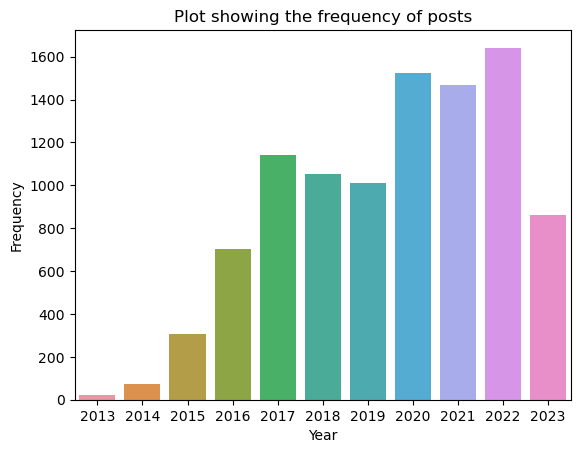

In [159]:
sns.countplot(x = fb.Date.dt.year)
plt.title('Plot showing the frequency of posts')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.savefig('.facebook_year.jpg');


The plot below also shows the frequency of counts per month. It seems there are less posts in january and august. We can't conclude yet though until we dig deeper

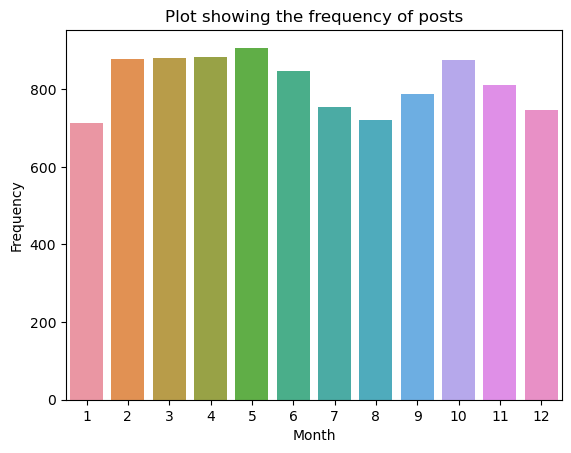

In [160]:
sns.countplot(x = fb.Date.dt.month)
plt.title('Plot showing the frequency of posts')
plt.xlabel('Month')
plt.ylabel('Frequency');

Taking a hourly level approach, we can see that there is a significant trend between 7am and 10pm with the peak around 10am. I would say that there is likely to be more facebook posts during the work hours of the day

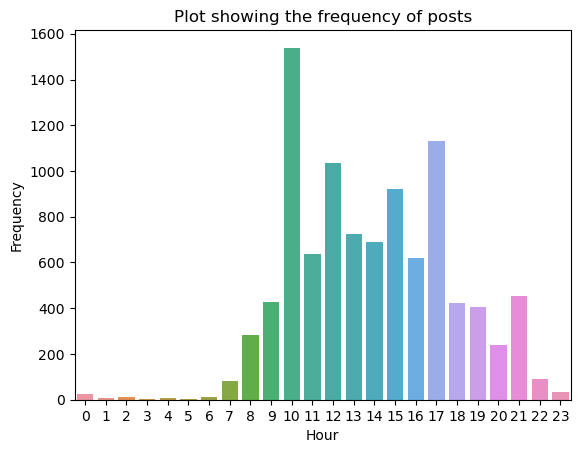

In [162]:
sns.countplot(x = fb.Date.dt.hour)
plt.title('Plot showing the frequency of posts')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.savefig('facebook_hour.jpg');

The plot below also has a pattern, there is a rise and fall in the frequency of posts in each month. More analysis could be done here

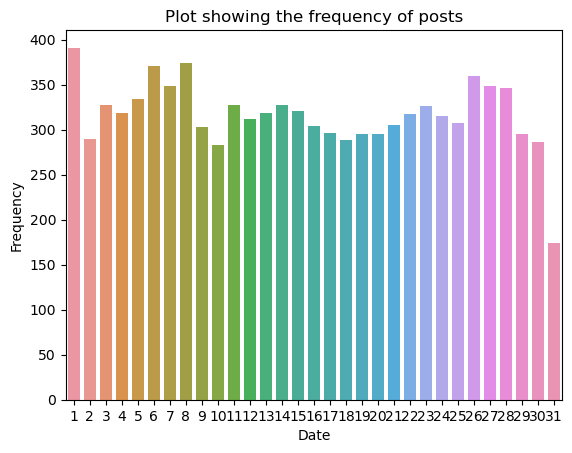

In [69]:
sns.countplot(x = fb.Date.dt.day)
plt.title('Plot showing the frequency of posts')
plt.xlabel('Date')
plt.ylabel('Frequency');

In pandas Monday is 0 while saturday is 6
The plot below shows that number of posts increases from monday to wednesday, keeps reducing and significantly reduces on saturday and sunday since they are weekends an workers are probably enjoying the weekend.

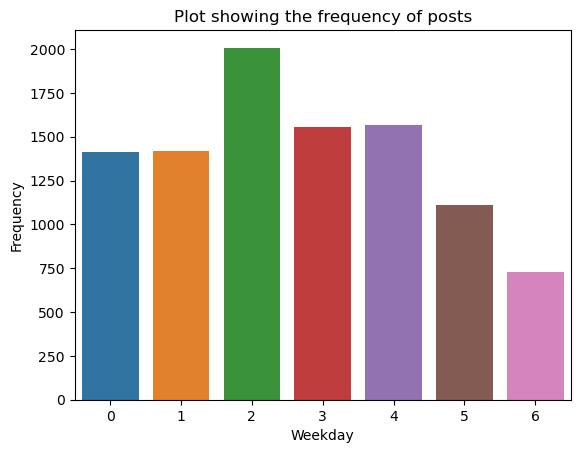

In [70]:
sns.countplot(x = fb.Date.dt.weekday)
plt.title('Plot showing the frequency of posts')
plt.xlabel('Weekday')
plt.ylabel('Frequency');


The visusalization below shows that in the entire dataset, the Photo content type seems to be prevalent than other forms of contents

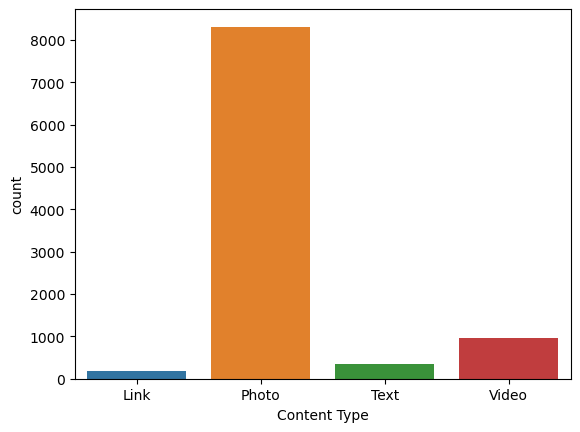

In [163]:
sns.countplot(x = 'Content Type', data = fb)
plt.savefig('content_types.jpg');

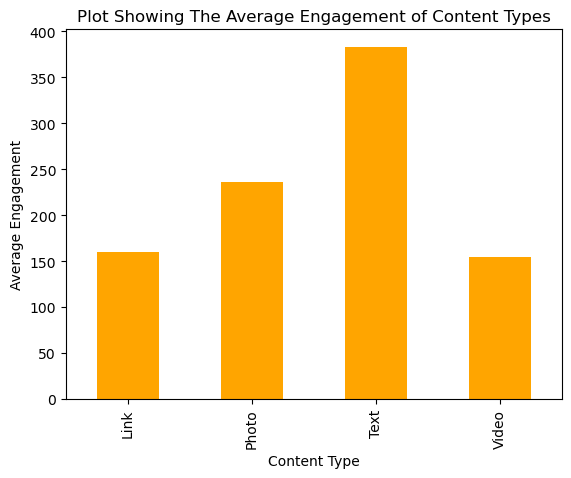

In [174]:
fb.groupby('Content Type')['Engagements'].mean().plot(kind = 'bar', color = 'orange')
plt.title('Plot Showing The Average Engagement of Content Types')
plt.xlabel('Content Type')
plt.ylabel('Average Engagement')
plt.savefig('content_types_engagement.jpg');

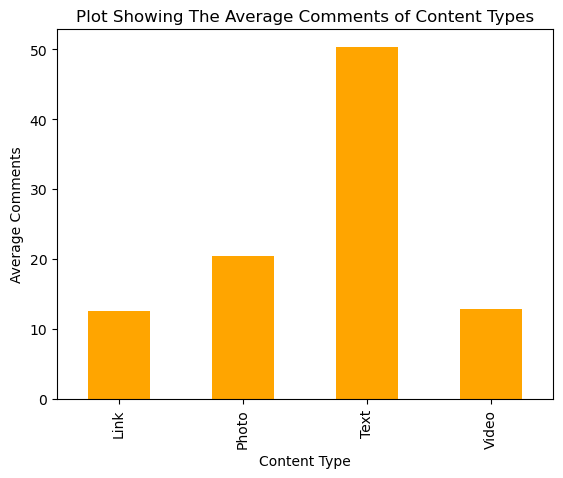

In [177]:
fb.groupby('Content Type')['Comments'].mean().plot(kind = 'bar', color = 'orange')
plt.title('Plot Showing The Average Comments of Content Types')
plt.xlabel('Content Type')
plt.ylabel('Average Comments')
plt.savefig('content_types_comments.jpg');

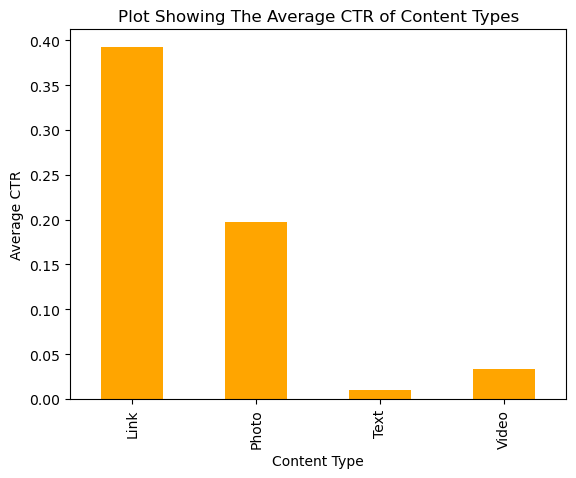

In [179]:
fb.groupby('Content Type')['Click-Through Rate'].mean().plot(kind = 'bar', color = 'orange')
plt.title('Plot Showing The Average CTR of Content Types')
plt.xlabel('Content Type')
plt.ylabel('Average CTR')
plt.savefig('content_types_ctr.jpg');

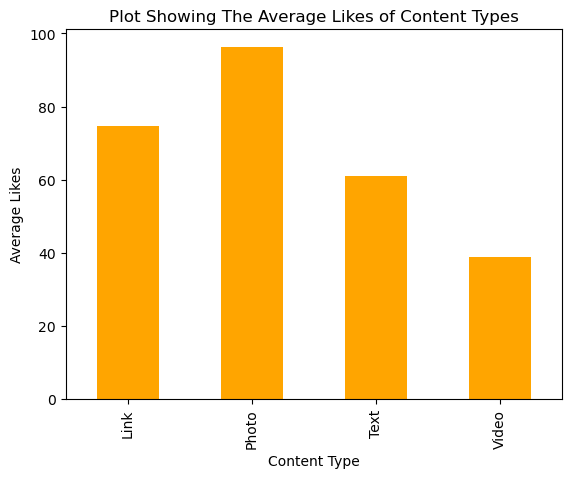

In [182]:
fb.groupby('Content Type')['Likes'].mean().plot(kind = 'bar', color = 'orange')
plt.title('Plot Showing The Average Likes of Content Types')
plt.xlabel('Content Type')
plt.ylabel('Average Likes')
plt.savefig('content_types_likes.jpg');

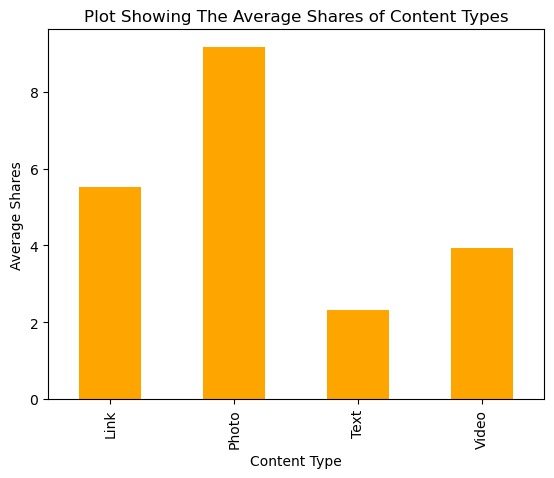

In [183]:
fb.groupby('Content Type')['Shares'].mean().plot(kind = 'bar', color = 'orange')
plt.title('Plot Showing The Average Shares of Content Types')
plt.xlabel('Content Type')
plt.ylabel('Average Shares')
plt.savefig('content_types_Shares.jpg');

The plot below shows the admins who sent the posts and it can also be seen that most of the posts were sent by people whose names were not mentioned

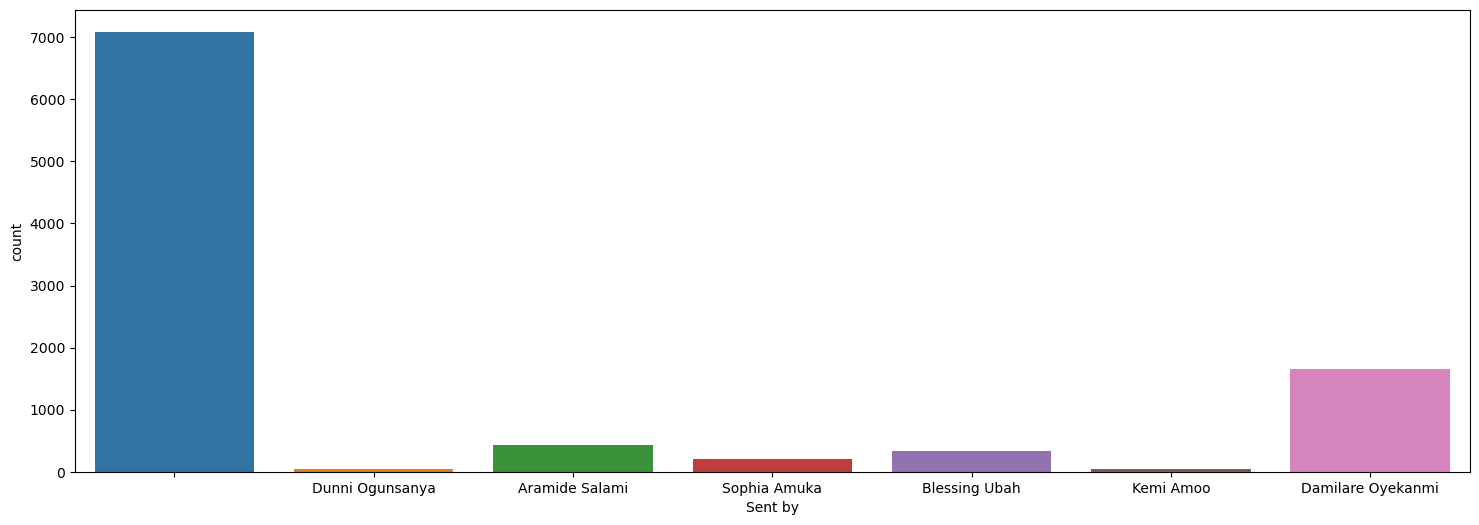

In [72]:
plt.figure(figsize=(18,6))
sns.countplot(x = 'Sent by', data = fb);

In [73]:
# nltk.download('stopwords')

def clean_text(text):
    if isinstance(text, str):
        # Remove symbols and digits
        text = ''.join([char for char in text if char.isalpha() or char.isspace()])
        
        # Tokenize the text
        words = text.lower().split()
        
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        words = [word for word in words if word not in stop_words]
        
        return ' '.join(words)
    else:
        return ''  # Return an empty string for missing or non-string values

In [74]:
fb_copy['Tags'] = fb_copy['Tags'].apply(clean_text)
# Concatenate all cleaned text into a single string
all_cleaned_text = ' '.join(fb_copy['Tags'])

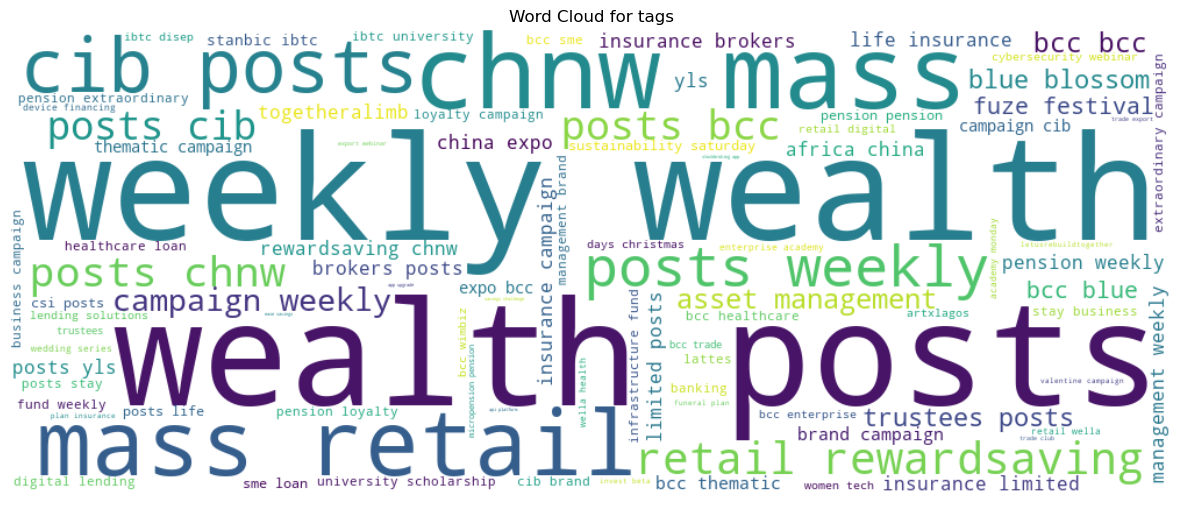

In [75]:
# Create a WordCloud object
wordcloud = WordCloud(width=1000, height=400, background_color='white').generate(all_cleaned_text)

# Display the WordCloud
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for tags')
plt.show()

The word cloud above shows the words that are often used in the tags column in the data

### More Exciting Explorations

Let's take a look at the correlation between the columns in the dataset. It is important to identify if there are interactions or no interactions at all. This is a multivariate analysis step

As seen in the figure below, some of the columns have high correlation while some do not. The scale at the right (0-1) helps to guide the visuals. The columns with which are entirely white need to be dropped, they signify zero variance, hence do not change through out the dataset.

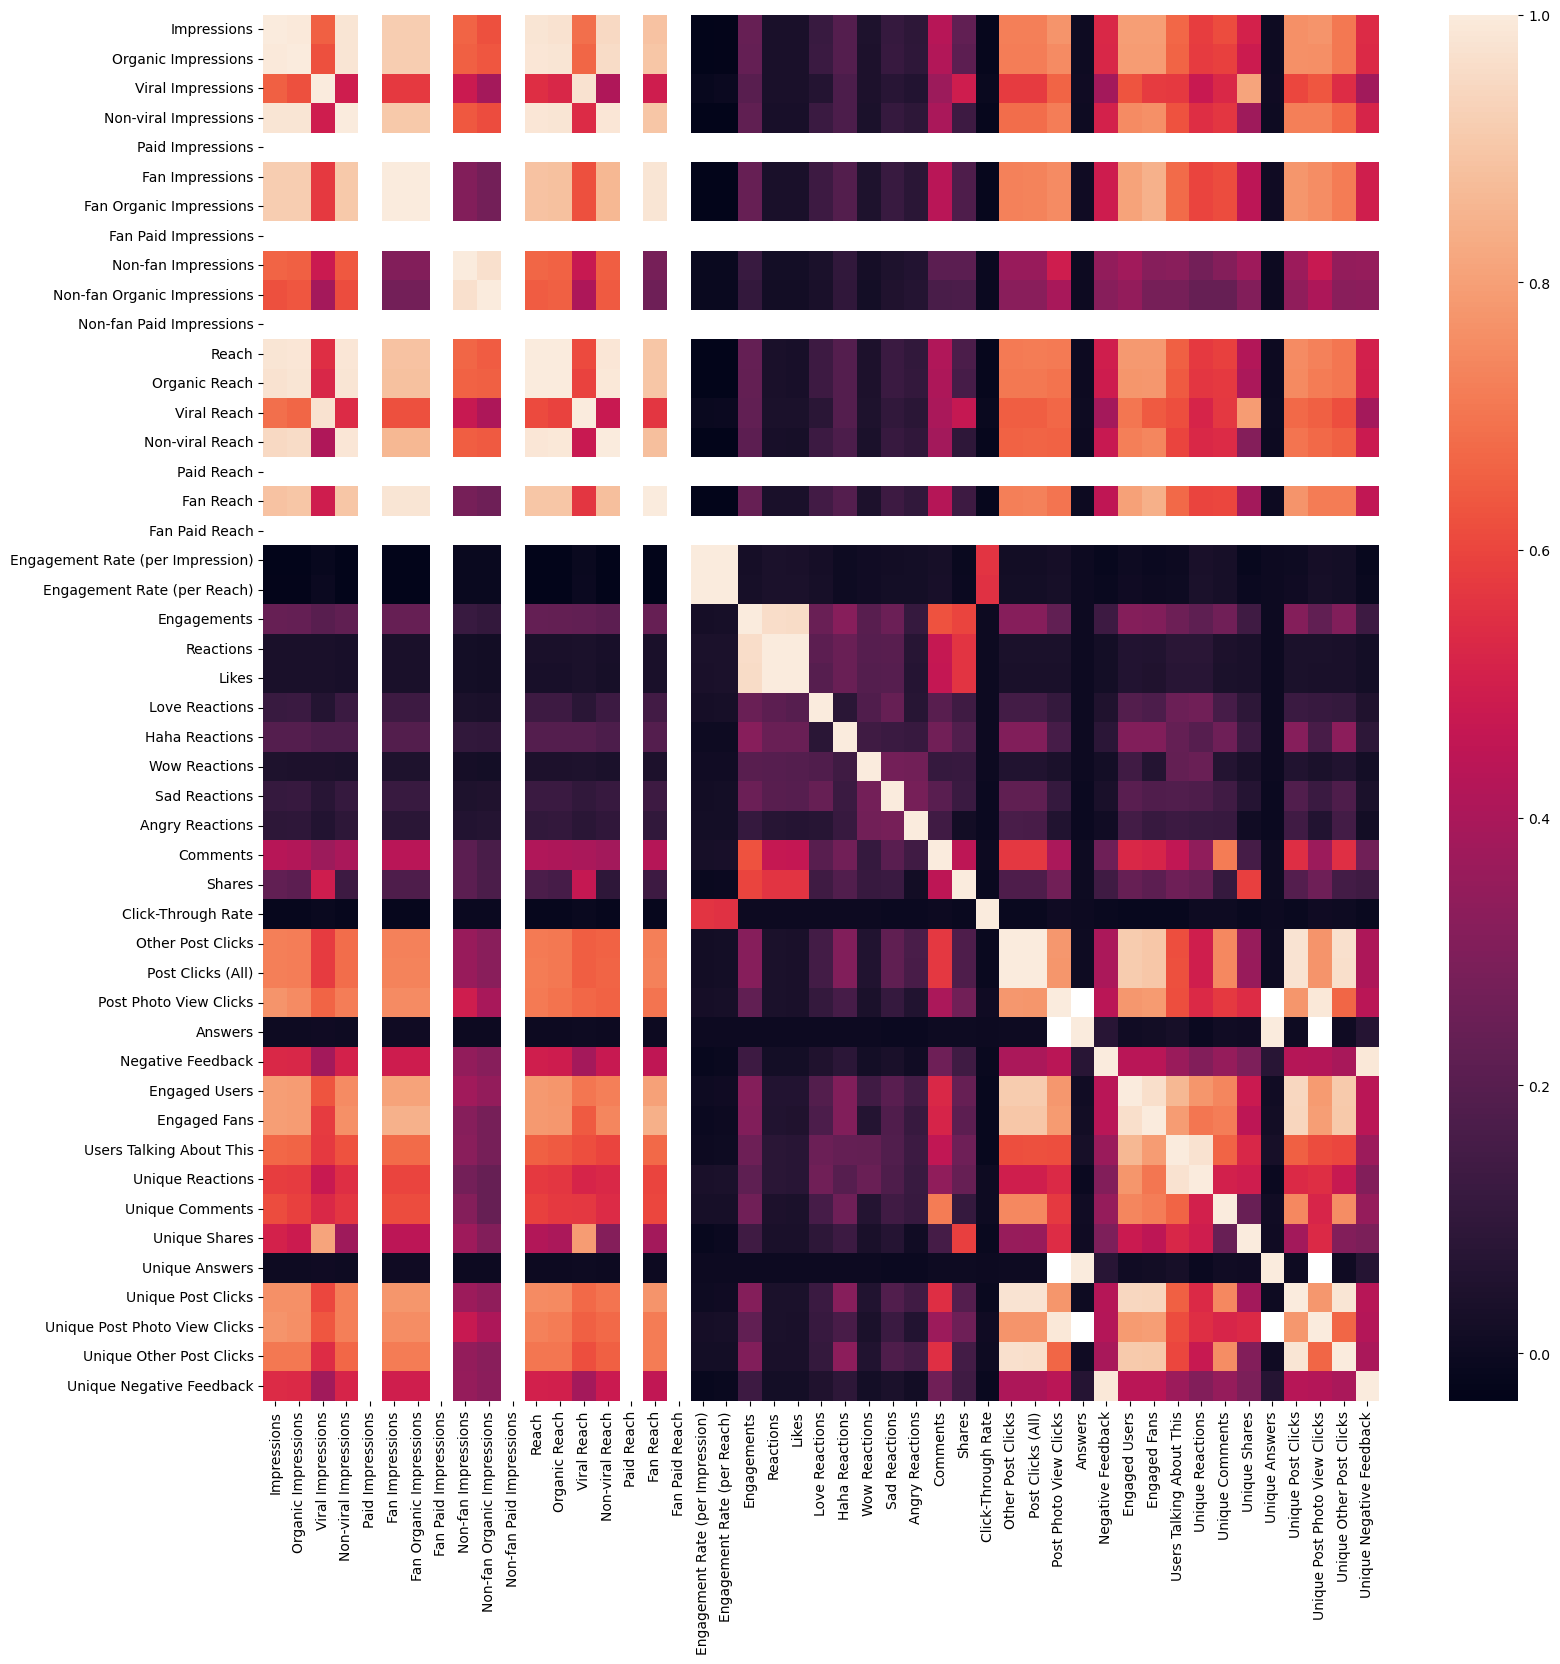

In [76]:
plt.figure(figsize=(18,18))
sns.heatmap(fb.corr());

In [77]:
# Identify columns with zero variance
zero_variance_columns = fb.select_dtypes('number').columns[fb.var() == 0]

# Remove columns with zero variance
fb = fb.drop(columns=zero_variance_columns)

C:\Users\DELL\AppData\Local\Temp\ipykernel_6740\97529767.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  zero_variance_columns = fb.select_dtypes('number').columns[fb.var() == 0]


After dropping the columns with zero variance, the heatmap can be better visualized below

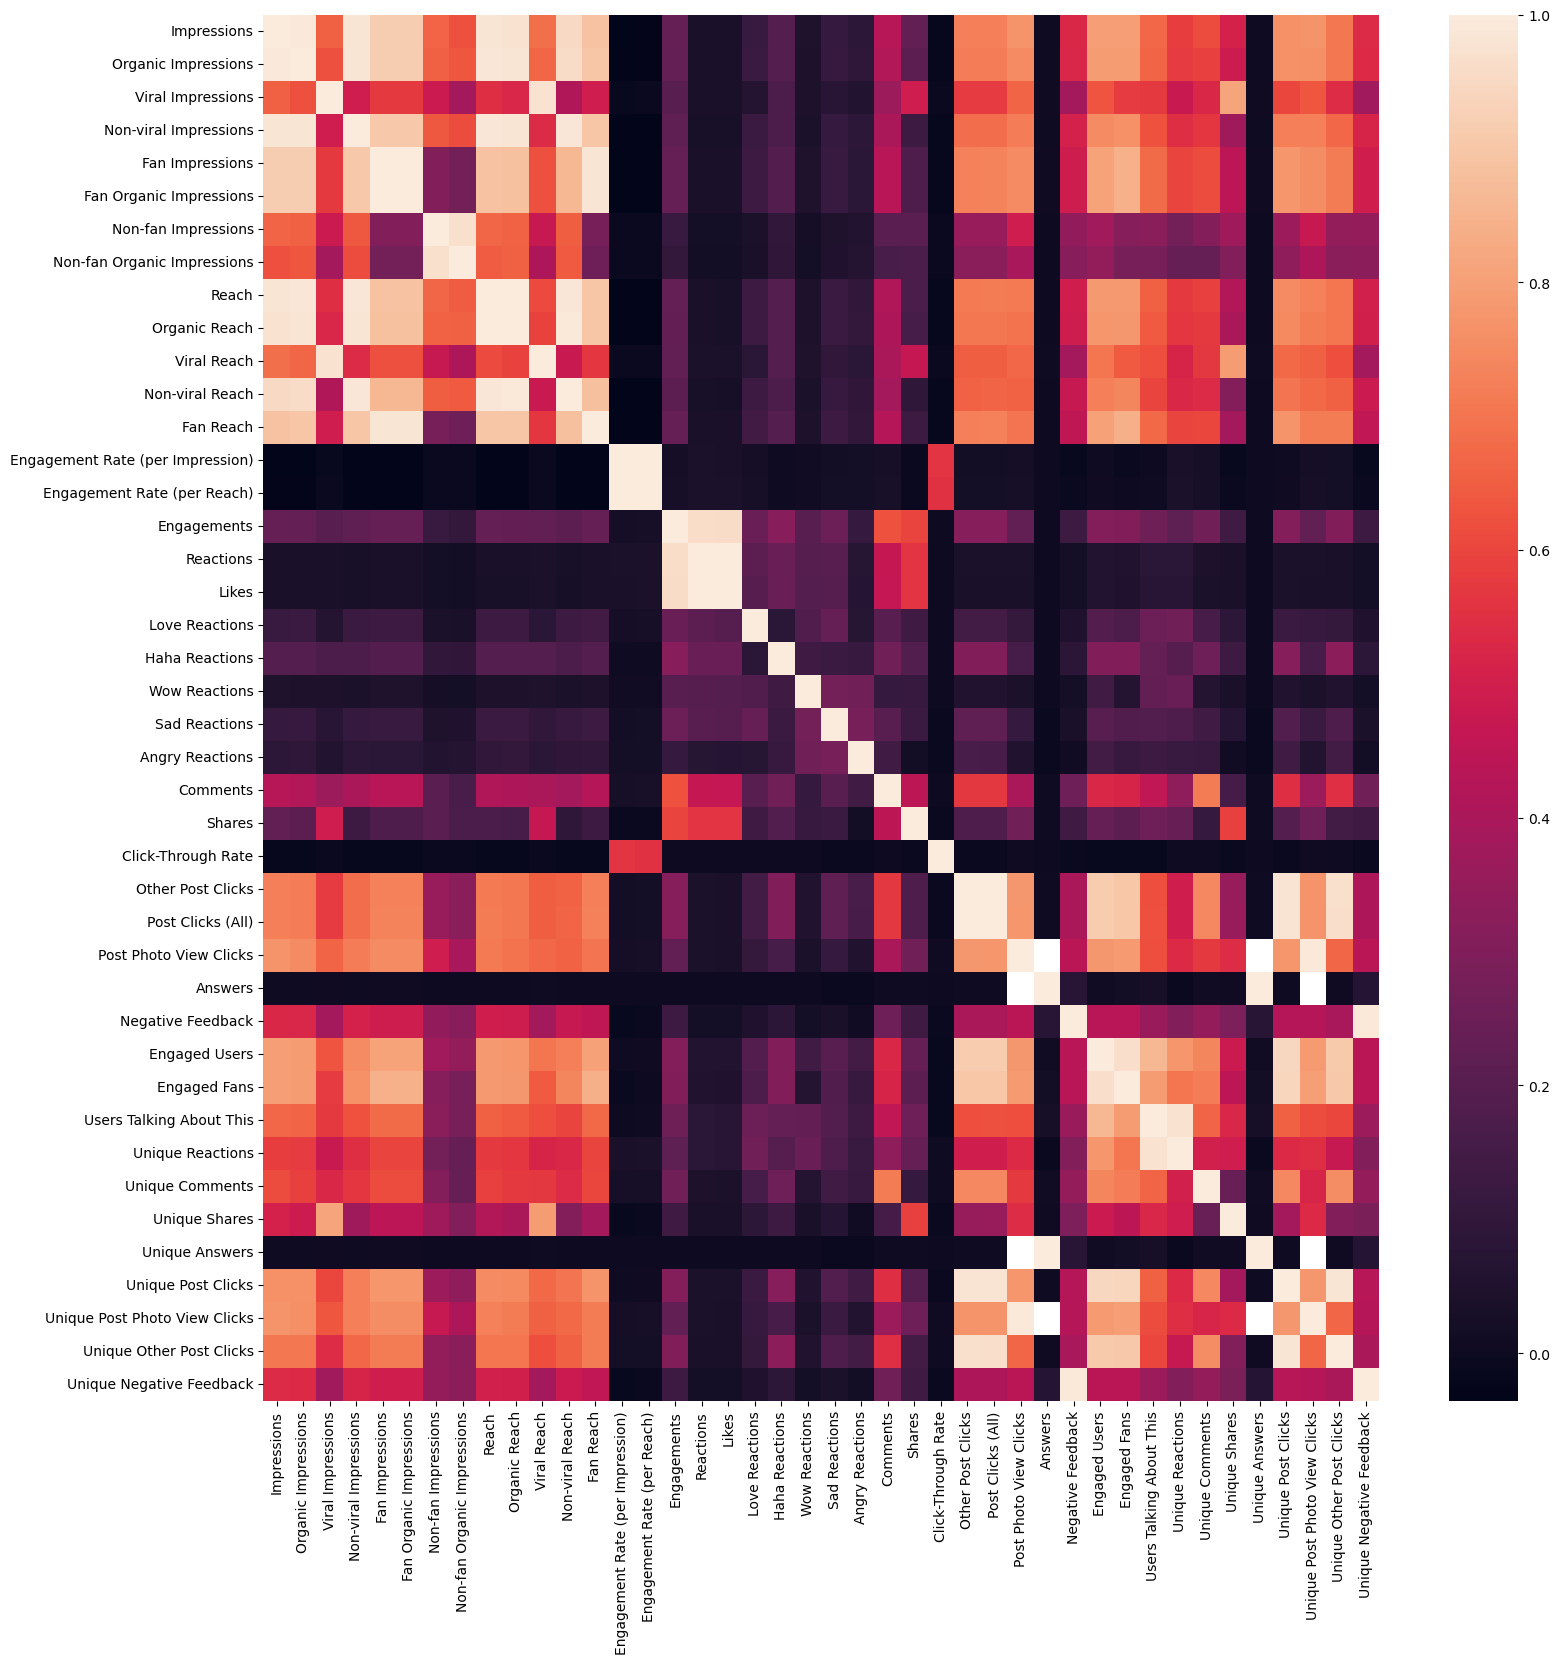

In [78]:
plt.figure(figsize=(18,18))
sns.heatmap(fb.corr());

Let's analyze the describe method for the dataset

Many columns have abnormal distributions, the mean is greater than the median, hence creating right-skewed distributions. For a good data science project, it is also good to work with a normal distribution. Not to worry, when creating models, the Standardization method in sklearn will be used

In [79]:
fb.describe()

,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Fan Impressions,Fan Organic Impressions,Non-fan Impressions,Non-fan Organic Impressions,Reach,Organic Reach,Viral Reach,Non-viral Reach,Fan Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Love Reactions,Haha Reactions,Wow Reactions,Sad Reactions,Angry Reactions,Comments,Shares,Click-Through Rate,Other Post Clicks,Post Clicks (All),Post Photo View Clicks,Answers,Negative Feedback,Engaged Users,Engaged Fans,Users Talking About This,Unique Reactions,Unique Comments,Unique Shares,Unique Answers,Unique Post Clicks,Unique Post Photo View Clicks,Unique Other Post Clicks,Unique Negative Feedback
count,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,7744.000000,7741.000000,8893.000000,8893.00000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,7681.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,8893.000000,7681.000000,8893.000000,8893.000000
mean,5857.725177,5794.522996,623.155066,5234.547959,4919.463398,4919.463398,938.261779,875.059597,5210.642078,5177.241313,455.310019,4773.610480,4442.161026,5.226931,5.629407,231.683234,91.88699,89.108512,2.305746,0.158102,0.129203,0.033959,0.151467,20.538738,8.381311,0.177167,108.780277,110.876195,30.141258,0.119420,0.327561,139.400427,115.994040,69.905544,58.733723,11.325424,5.344091,0.113910,83.112673,28.218201,63.229956,0.319015
std,7295.418176,7168.084516,1650.699781,6341.260127,5747.002971,5747.002971,3067.161092,3002.945270,6327.918115,6290.312090,1129.762366,5758.010293,5014.352672,53.850612,54.432471,1107.892858,1014.84987,1010.636019,16.024033,1.603587,2.320830,0.226888,0.669274,59.085734,19.115478,6.746488,269.947579,270.738336,64.368420,4.263097,0.775294,244.943697,203.924973,112.712558,97.310893,33.562968,10.460694,4.079198,189.606940,58.202670,167.329704,0.743691
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1930.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,2007.000000,5.000000,1888.000000,1678.000000,1678.000000,263.000000,242.000000,1875.000000,1870.000000,4.000000,1725.000000,1512.000000,1.830000,1.990000,56.000000,23.00000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,18.000000,19.000000,1.000000,0.000000,0.000000,37.000000,29.000000,20.000000,17.000000,1.000000,0.000000,0.000000,16.000000,1.000000,11.000000,0.000000
50%,4082.000000,4063.000000,88.000000,3784.000000,3483.000000,3483.000000,466.000000,449.000000,3771.000000,3751.000000,83.000000,3488.000000,3201.000000,2.570000,2.820000,107.000000,39.00000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2.000000,0.000000,47.000000,48.000000,8.000000,0.000000,0.000000,73.000000,61.000000,39.000000,33.000000,5.000000,1.000000,0.000000,38.000000,8.000000,27.000000,0.000000
75%,7376.000000,7292.000000,544.000000,6564.000000,6207.000000,6207.000000,849.000000,804.000000,6534.000000,6468.000000,449.000000,6099.000000,5699.000000,3.720000,4.220000,220.000000,76.00000,74.000000,2.000000,0.000000,0.000000,0.000000,0.000000,18.000000,10.000000,0.000000,105.000000,108.000000,36.000000,0.000000,0.000000,154.000000,129.000000,78.000000,65.000000,10.000000,6.000000,0.000000,83.000000,34.000000,58.000000,0.000000
max,207378.000000,207378.000000,35816.000000,207373.000000,103287.000000,103287.000000,206231.000000,206231.000000,207378.000000,207378.000000,24829.000000,213627.000000,76764.000000,2757.000000,2757.000000,72474.

deriving a visualiztion for the first 12 numeric columns in the dataset

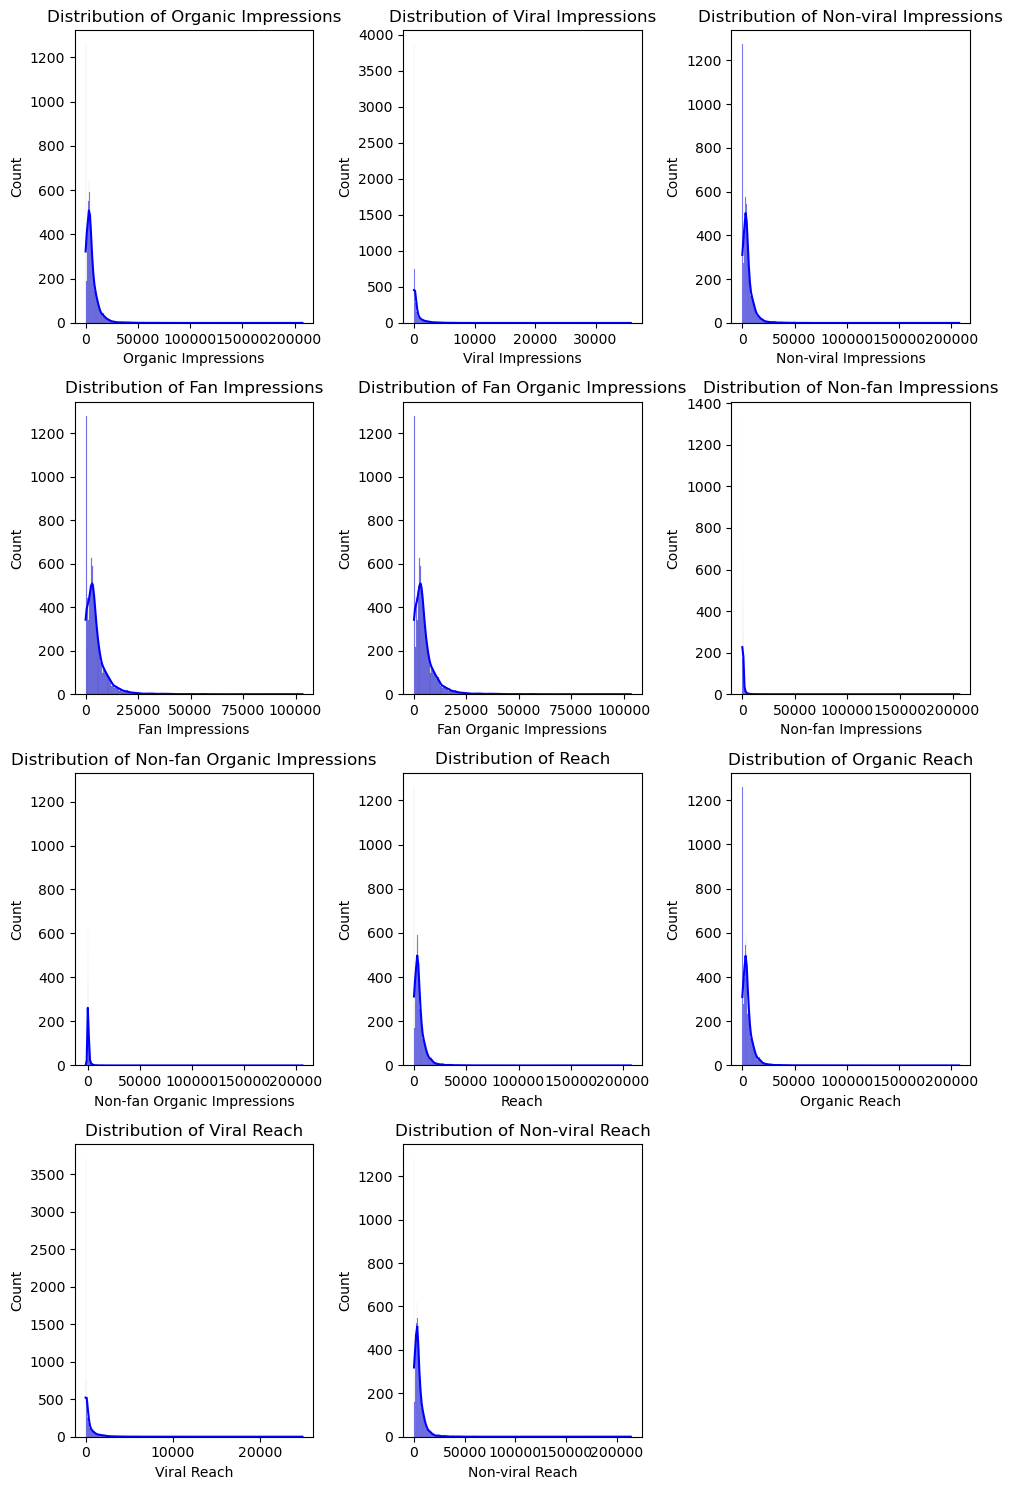

In [80]:
# Get a list of numeric columns in the dataset
numeric_columns = fb.select_dtypes('number').columns.to_list()[1:12]

# Define the number of rows and columns for the subplot grid
n_rows = 4
n_cols = 3

# Create a figure and a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 15),)

# Flatten the 2D array of subplots into a 1D array
axes = axes.flatten()

# Iterate through the numeric columns and plot distribution plots
for i, col in enumerate(numeric_columns):
    sns.histplot(fb[col], ax=axes[i], kde=True, color = 'blue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)

# Remove any empty subplots
for i in range(len(numeric_columns), n_rows * n_cols):
    fig.delaxes(axes[i])

# Adjust the layout
plt.tight_layout()
plt.show()


The figure above shows that the whole data is largely right skewed. This could be due to the fact that there were likely very high impressions or engagements from posts on some certain days. Next thing is to see how we can find a way to identify and clean columns that have significantly large numbers compared to the rest of the data

In [81]:
#checking for null values present in the data
fb.isna().sum()

Date                                   0
Post ID                                0
Network                                0
Post Type                              0
Content Type                           0
Profile                                0
Sent by                                0
Link                                   0
Post                                 250
Linked Content                       341
Impressions                          910
Organic Impressions                  910
Viral Impressions                    910
Non-viral Impressions                910
Fan Impressions                      910
Fan Organic Impressions              910
Non-fan Impressions                  910
Non-fan Organic Impressions          910
Reach                                910
Organic Reach                        910
Viral Reach                          910
Non-viral Reach                      910
Fan Reach                            910
Engagement Rate (per Impression)    2059
Engagement Rate 

In [82]:
#recalculating the shape of the data
fb.shape

(9803, 52)

It is almost of no use if a lot of columns are empty per row, hence i used the thresh option in dropna to define a threshold. Upon meeting this threshold, any number of null values above will be dropped completely from the data

In [83]:
fb = fb.dropna(thresh = 15)

Next, I used the groupby method in pandas to group by the content type and find the average or mean of all the numeric colums. The purpose of this is to compare each content type and the average expected

In [84]:
fb.groupby('Content Type').mean()

,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Fan Impressions,Fan Organic Impressions,Non-fan Impressions,Non-fan Organic Impressions,Reach,Organic Reach,Viral Reach,Non-viral Reach,Fan Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Love Reactions,Haha Reactions,Wow Reactions,Sad Reactions,Angry Reactions,Comments,Shares,Click-Through Rate,Other Post Clicks,Post Clicks (All),Post Photo View Clicks,Answers,Negative Feedback,Engaged Users,Engaged Fans,Users Talking About This,Unique Reactions,Unique Comments,Unique Shares,Unique Answers,Unique Post Clicks,Unique Post Photo View Clicks,Unique Other Post Clicks,Unique Negative Feedback
Content Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Link,3848.063830,3806.702128,386.648936,3461.180851,3342.063830,3342.063830,506.000000,464.638298,3263.978723,3237.329787,273.159574,3007.074468,2874.361702,4.049500,4.826875,159.723404,78.627660,74.595745,2.478723,0.063830,1.446809,0.010638,0.031915,12.585106,5.510638,0.392447,49.170213,63.000000,2.960000,0.000000,0.276596,124.872340,69.276596,78.542553,73.053191,8.393617,4.117021,0.000000,51.670213,2.960000,39.446809,0.276596
Photo,6230.598162,6158.421011,682.903874,5547.673539,5261.848720,5261.848720,968.749442,896.572292,5519.331582,5481.197242,493.047669,5045.098621,4739.836638,5.033549,5.387778,236.332370,99.080105,96.309127,2.316612,0.150492,0.120946,0.032305,0.150624,20.486802,9.167695,0.197687,105.423638,107.597768,30.359685,0.000000,0.341957,140.440709,118.415758,71.874327,60.834406,10.941694,5.706763,0.000000,82.080236,28.424951,60.357058,0.333290
Text,7531.760000,7529.040000,548.440000,6983.320000,6645.058182,6645.058182,886.701818,883.981818,7079.610909,7082.509091,489.989091,6623.807273,6283.090909,3.839925,4.303745,382.876364,63.741818,61.069091,1.610909,0.716364,0.145455,0.040000,0.160000,50.298182,2.323636,0.009527,265.890909,266.512727,6.631579,3.861818,0.461818,248.898182,214.690909,92.367273,61.330909,34.210909,1.847273,3.683636,193.687273,5.631579,192.443636,0.440000
Video,2435.415842,2426.843784,169.679868,2265.717272,1692.260726,1692.260726,743.155116,734.583058,2260.531353,2255.105611,147.513751,2122.200220,1553.621562,7.127436,7.823978,154.436744,41.513751,38.770077,2.407041,0.062706,0.057206,0.048405,0.168317,12.793179,3.922992,0.033718,95.533553,96.206821,0.000000,0.000000,0.171617,99.061606,70.678768,45.723872,38.869087,7.919692,3.490649,0.000000,61.561056,0.000000,50.665567,0.167217


As humans, the above table is just a bunch of weird numbers but a visualization can be plotted to understand it better and it is shown below

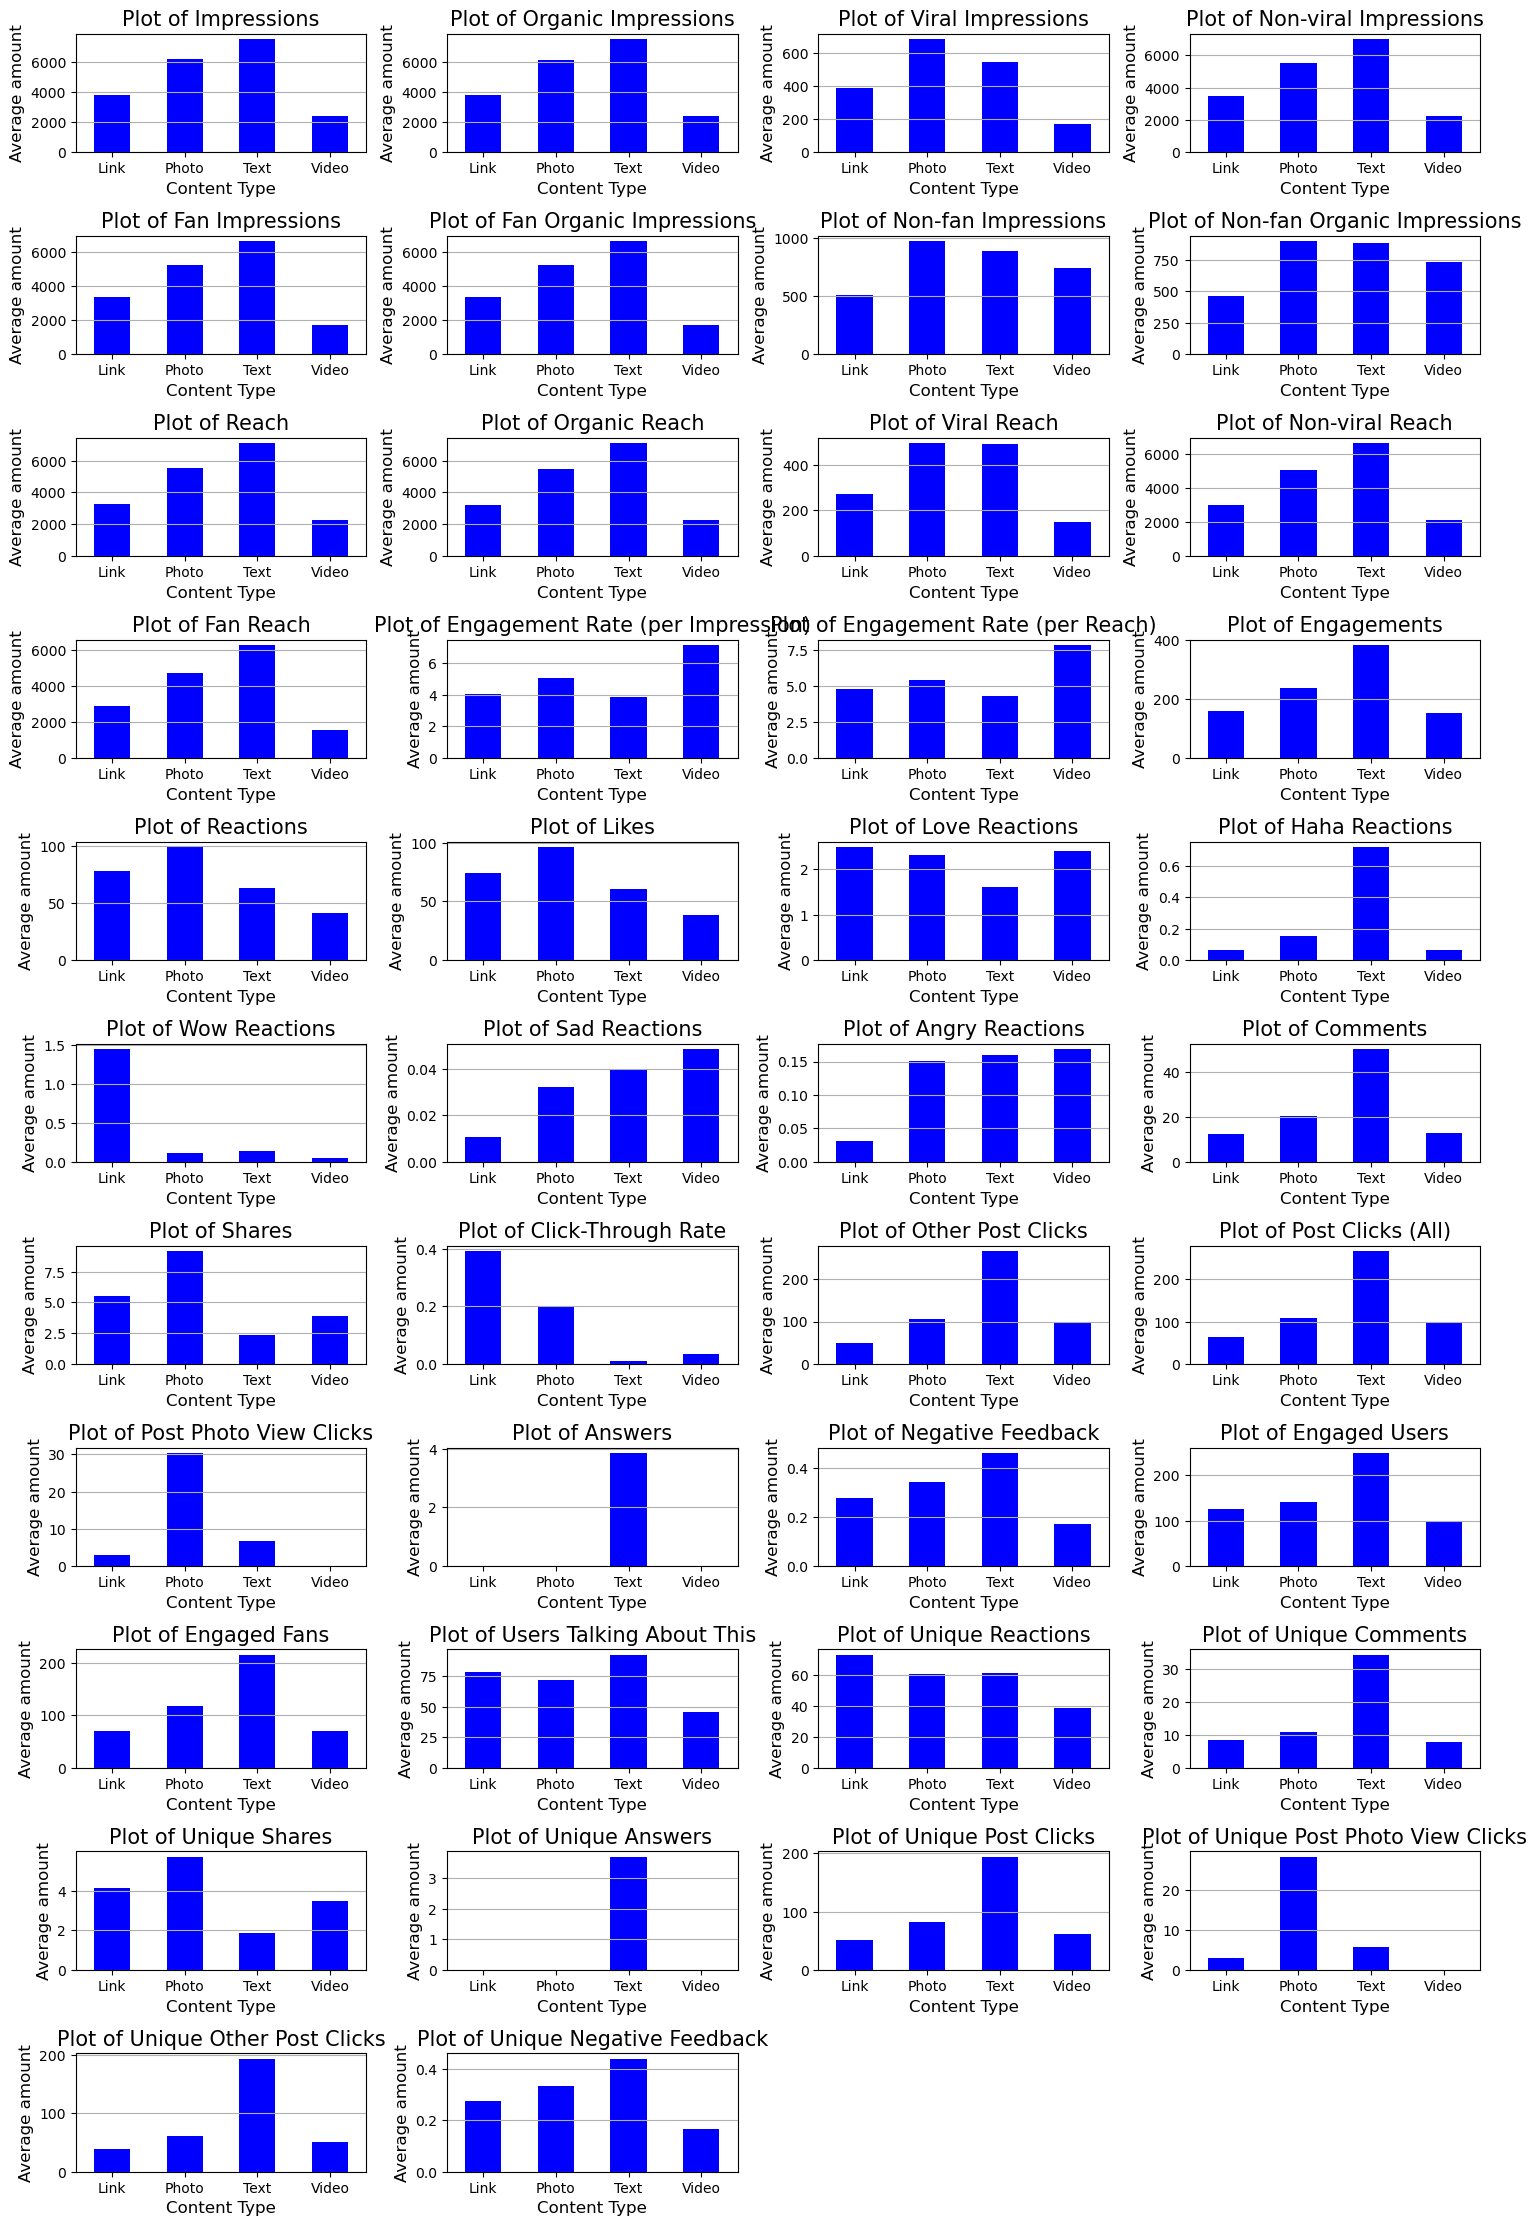

In [85]:
# Define the columns to plot (excluding 'Content Type')
columns_to_plot = fb.groupby('Content Type').mean().columns

# Define the number of rows and columns for the subplot grid
n_rows = 15
n_cols = 4  # You can adjust this to 5x5 or any other size as needed

# Create a figure and a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 30))

# Flatten the 2D array of subplots into a 1D array
axes = axes.flatten()

# Iterate through the columns and plot each one
for i, col in enumerate(columns_to_plot):
    fb.groupby('Content Type').mean()[col].plot(kind='bar', color='blue', ax=axes[i])
    axes[i].set_title(f'Plot of {col}', fontsize = 15)
    axes[i].set_ylabel('Average amount', fontsize = 12)
    axes[i].set_xlabel('Content Type', fontsize = 12)
    axes[i].tick_params(axis='x', labelrotation=0)
    axes[i].grid(axis='y')

# Remove any empty subplots
for i in range(len(columns_to_plot), n_rows * n_cols):
    fig.delaxes(axes[i])

# Adjust the layout
plt.tight_layout()
plt.show()


The above plot juxtaposes all of the numeric columns, based on the content type and mean. For example, the first plot shows the Plot of impressions. It can be seen that text has the highest impressions across board, followed by photos, link and videos. It means when people see texts, they is likely to be more impression rate.

Let's take a look at some of the posts that were sent

In [86]:
fb['Post'][-10:]

7104    Hey CEOs, it’s time to say goodbye to complexi...
5826    With the Stanbic IBTC SME Online-Bento Redirec...
7267    Together, we can make a difference and build a...
6011    Choose from our wide range of insurance option...
6650                Tell us in the comments.​\n\n#ITCANBE
4111                           Answer: China​\n\n#ITCANBE
5570    Here are some mistakes you shouldn’t make duri...
1972    What skill (s) do you have, that no one ever t...
4859    Sade was able to acquire a home loan and make ...
7443    Your money should not be a gamble. Before you ...
Name: Post, dtype: object

Each post have varied length, I calculated the length of each post and plotted the histogram below. The lenght of most posts is usually between 10 to 300 words in a singular post

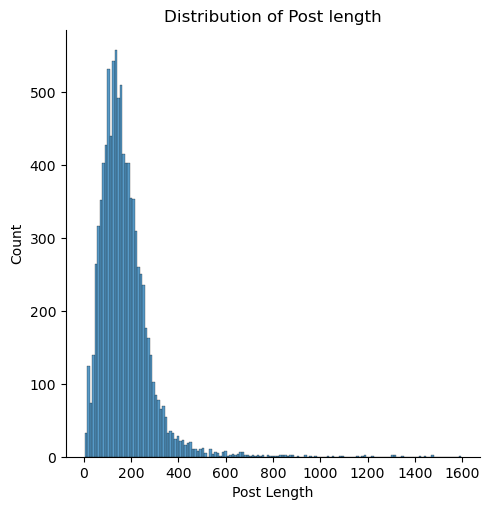

In [187]:
fb['Post Length'] = fb['Post'].str.len()
sns.displot(fb['Post Length'])
plt.title('Distribution of Post length')
plt.savefig('post_length', dpi = 250);

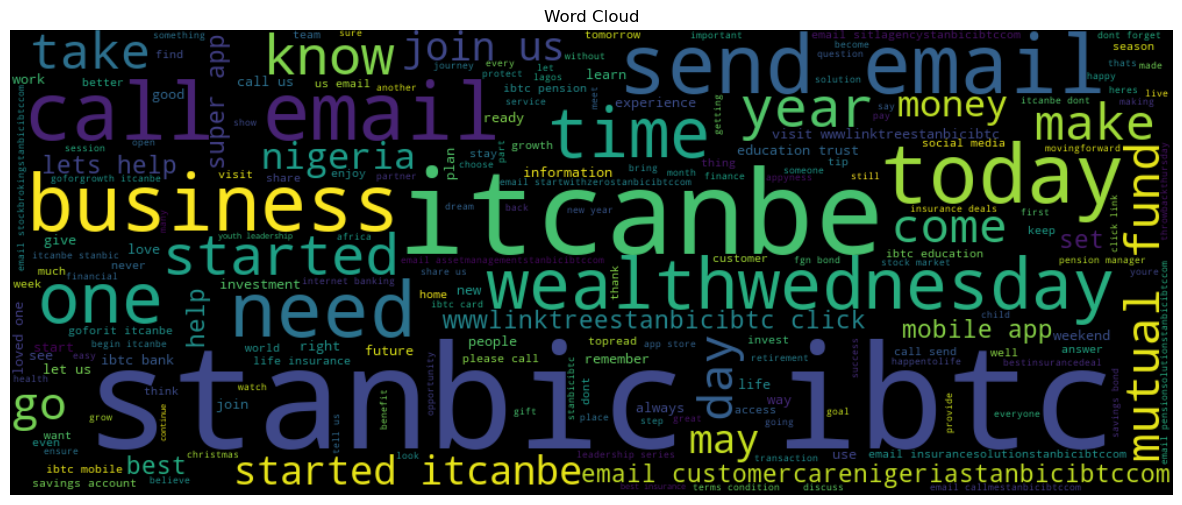

In [189]:
fb['Post'] = fb['Post'].apply(clean_text)
# Concatenate all cleaned text into a single string
all_cleaned_text = ' '.join(fb['Post'])

# Create a WordCloud object
wordcloud = WordCloud(width=1000, height=400, background_color='black').generate(all_cleaned_text)

# Display the WordCloud
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.savefig('word_cloud_facebook.jpg')
plt.show()


It shows that stanbic ibtc, email, education, itcanbe,love, need, call, money, nigeria etc are often talked about in the posts

'Itcanbe' is present as much times as stanbic ibtc because 'itcanbe' is like a motto, which might also be referred to as hashtags in some social media websites

## Feature Engineering

In this section, I created date-related features and other features too

In [90]:
#deriving data related features

fb['year'] = fb['Date'].dt.year 
fb['quarter'] = fb['Date'].dt.quarter
fb['month'] = fb['Date'].dt.month
fb['day'] = fb['Date'].dt.day 
fb['hour'] = fb['Date'].dt.hour
fb['minute'] = fb['Date'].dt.minute
fb['weekdays'] = fb['Date'].dt.weekday

In [91]:
# Calculating Engagement Ratio (Engagements per Impression)
fb['Engagement Ratio'] = fb['Engagements'] / fb['Impressions']

# Calculating Reach Ratio (Reach per Impression)
fb['Reach Ratio'] = fb['Reach'] / fb['Impressions']

# Calculating Click-Through Rate (CTR) per impression
fb['CTR'] = fb['Click-Through Rate'] / fb['Impressions']

# Calculating Reactions Ratio (Reactions per Engagement)
fb['Reactions Ratio'] = fb['Reactions'] / fb['Engagements']

# Calculating Comments Ratio (Comments per Engagement)
fb['Comments Ratio'] = fb['Comments'] / fb['Engagements']

# Calculating Shares Ratio (Shares per Engagement)
fb['Shares Ratio'] = fb['Shares'] / fb['Engagements']

# Calculating Unique Engagement Ratio (Unique Reactions per Unique Engagements)
fb['Unique reaction/comment Ratio'] = fb['Unique Reactions'] / fb['Unique Comments']

# Calculating Negative Feedback Ratio (Negative Feedback per Engagement)
fb['Negative Feedback Ratio'] = fb['Negative Feedback'] / fb['Engagements']

# Calculating Average Engagement Rate (Average Engagement per Post)
average_engagement_rate = fb['Engagements'].mean()
fb['Average Engagement Rate'] = average_engagement_rate

# Calculating Fan Engagement Ratio (Fan Engagements per Fan Impressions)
fb['Fan impressions Ratio'] = fb['Fan Impressions'] / fb['Impressions']

# Calculating Non-Fan Engagement Ratio (Non-fan Engagements per Non-fan Impressions)
fb['Non-fan impressions Ratio'] = fb['Non-fan Impressions'] / fb['Non-fan Impressions']

# Calculating Impression Share
total_impressions = fb['Impressions'].sum()
fb['Organic Impression Share'] = fb['Organic Impressions'] / total_impressions
fb['Viral Impression Share'] = fb['Viral Impressions'] / total_impressions
fb['Non-Viral Impression Share'] = fb['Non-viral Impressions'] / total_impressions

# Calculating Post Length (assuming a 'Post Content' column)
fb['Post Length'] = fb['Post'].str.len()

# Calculating Interaction Diversity (Unique Interactions per Engagement)
fb['Interaction Diversity'] = (fb['Unique Reactions'] + fb['Unique Comments'] + fb['Unique Shares']) / fb['Engagements']



# Modelling [Machine Learning]

### Engagements Classification

The engagement can be predicted. In this section, i created a machine learning model, a classifier which classifies the engagements.

In [92]:
#replacing inf,np.nan values with zero
fb = fb.replace([np.inf,-np.inf],np.nan)
fb.fillna(0,inplace= True)

In [93]:
fb['Engagements'].describe()

count     8893.000000
mean       231.683234
std       1107.892858
min          0.000000
25%         56.000000
50%        107.000000
75%        220.000000
max      72474.000000
Name: Engagements, dtype: float64

In [94]:
#binning the engagement column into three different classes
def binningEngagements(x):
    if x <= 50:
        return 0 #low engagement
    elif x > 50 and x <= 150:
        return 1 #medium engagement
    elif x > 150 :
        return 2 #high engagement
    else:
        return -1 #no engagement

In [95]:
fb['Engagements_Class'] = fb['Engagements'].apply(lambda x : binningEngagements(x))

In [96]:
fb['Engagements_Class'].value_counts()

1    3735
2    3278
0    1880
Name: Engagements_Class, dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


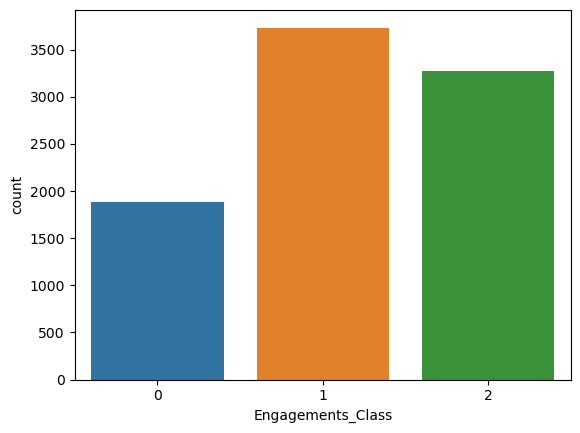

In [97]:
sns.countplot(fb['Engagements_Class']);

The countplot above shows that there are less data points in class 0

In [98]:
df_engage = fb.drop(columns = ['Date',	'Post ID',	'Network', 'Post Type','Profile',	'Sent by',
                               'Link', 'Post','Linked Content','Engagement Ratio','Engagements', 'Engaged Users'])

In [99]:
le = LabelEncoder()

In [100]:
#encoding the content type column
df_engage['Content Type'] = le.fit_transform(df_engage['Content Type'])

In [101]:
df_engage.head(5)

,Content Type,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Fan Impressions,Fan Organic Impressions,Non-fan Impressions,Non-fan Organic Impressions,Reach,Organic Reach,Viral Reach,Non-viral Reach,Fan Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Reactions,Likes,Love Reactions,Haha Reactions,Wow Reactions,Sad Reactions,Angry Reactions,Comments,Shares,Click-Through Rate,Other Post Clicks,Post Clicks (All),Post Photo View Clicks,Answers,Negative Feedback,Engaged Fans,Users Talking About This,Unique Reactions,Unique Comments,Unique Shares,Unique Answers,Unique Post Clicks,Unique Post Photo View Clicks,Unique Other Post Clicks,Unique Negative Feedback,Post Length,year,quarter,month,day,hour,minute,weekdays,Reach Ratio,CTR,Reactions Ratio,Comments Ratio,Shares Ratio,Unique reaction/comment Ratio,Negative Feedback Ratio,Average Engagement Rate,Fan impressions Ratio,Non-fan impressions Ratio,Organic Impression Share,Viral Impression Share,Non-Viral Impression Share,Interaction Diversity,Engagements_Class
8892,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132.0,132.0,0.0,0.0,0.0,0.0,0.0,670.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56,2013,4,11,26,20,16,1,0.0,0.0,0.162562,0.825123,0.012315,0.0,0.0,231.683234,0.0,0.0,0.0,0.0,0.0,0.0,2
8891,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,54.0,0.0,0.0,0.0,0.0,0.0,80.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43,2013,4,11,29,19,15,4,0.0,0.0,0.391304,0.579710,0.028986,0.0,0.0,231.683234,0.0,0.0,0.0,0.0,0.0,0.0,1
8890,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115,2014,3,7,24,10,15,3,0.0,0.0,0.416667,0.583333,0.000000,0.0,0.0,231.683234,0.0,0.0,0.0,0.0,0.0,0.0,0
8889,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79,2014,3,8,5,16,55,1,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,231.683234,0.0,0.0,0.0,0.0,0.0,0.0,0
8888,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18,2014,4,10,31,10,12,4,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,231.683234,0.0,0.0,0.0,0.0,0.0,0.0,0


In [102]:
X,y = df_engage.drop('Engagements_Class',axis = 1) , df_engage['Engagements_Class']

In [103]:
#splitting
xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state = 42, stratify = y)

In [104]:
lr = CatBoostClassifier(random_state = 42, iterations = 200)

In [105]:
#training
lr.fit(xtrain,ytrain)

Learning rate set to 0.33961
0:	learn: 0.7111997	total: 294ms	remaining: 58.6s
1:	learn: 0.5075361	total: 374ms	remaining: 37.1s
2:	learn: 0.3988355	total: 458ms	remaining: 30.1s
3:	learn: 0.3262291	total: 543ms	remaining: 26.6s
4:	learn: 0.2733179	total: 594ms	remaining: 23.2s
5:	learn: 0.2337456	total: 674ms	remaining: 21.8s
6:	learn: 0.2070006	total: 780ms	remaining: 21.5s
7:	learn: 0.1846510	total: 954ms	remaining: 22.9s
8:	learn: 0.1674390	total: 1.23s	remaining: 26.1s
9:	learn: 0.1569989	total: 1.72s	remaining: 32.7s
10:	learn: 0.1475438	total: 1.92s	remaining: 33s
11:	learn: 0.1371580	total: 2.12s	remaining: 33.1s
12:	learn: 0.1303487	total: 2.43s	remaining: 35s
13:	learn: 0.1257802	total: 2.65s	remaining: 35.3s
14:	learn: 0.1190008	total: 2.91s	remaining: 35.9s
15:	learn: 0.1162411	total: 3.1s	remaining: 35.7s
16:	learn: 0.1145181	total: 3.28s	remaining: 35.3s
17:	learn: 0.1105673	total: 3.45s	remaining: 34.9s
18:	learn: 0.1050720	total: 3.65s	remaining: 34.8s
19:	learn: 0.1041

161:	learn: 0.0215907	total: 23.9s	remaining: 5.59s
162:	learn: 0.0214322	total: 24s	remaining: 5.44s
163:	learn: 0.0213427	total: 24.1s	remaining: 5.28s
164:	learn: 0.0212079	total: 24.2s	remaining: 5.13s
165:	learn: 0.0210829	total: 24.3s	remaining: 4.97s
166:	learn: 0.0208823	total: 24.4s	remaining: 4.82s
167:	learn: 0.0207465	total: 24.5s	remaining: 4.67s
168:	learn: 0.0205901	total: 24.6s	remaining: 4.52s
169:	learn: 0.0205026	total: 24.8s	remaining: 4.38s
170:	learn: 0.0204440	total: 24.9s	remaining: 4.23s
171:	learn: 0.0203318	total: 25.1s	remaining: 4.08s
172:	learn: 0.0201934	total: 25.2s	remaining: 3.93s
173:	learn: 0.0200621	total: 25.3s	remaining: 3.78s
174:	learn: 0.0200405	total: 25.4s	remaining: 3.63s
175:	learn: 0.0198722	total: 25.5s	remaining: 3.48s
176:	learn: 0.0198234	total: 25.6s	remaining: 3.33s
177:	learn: 0.0196817	total: 25.7s	remaining: 3.18s
178:	learn: 0.0195160	total: 25.9s	remaining: 3.03s
179:	learn: 0.0193703	total: 26s	remaining: 2.89s
180:	learn: 0.01

In [106]:
pred = lr.predict(xtest)

In [107]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       470
           1       0.98      0.98      0.98       934
           2       0.99      0.98      0.99       820

    accuracy                           0.98      2224
   macro avg       0.98      0.98      0.98      2224
weighted avg       0.98      0.98      0.98      2224



From the classfication report above, it can be seen that there is about 98% accuracy and a high score for f1-score too

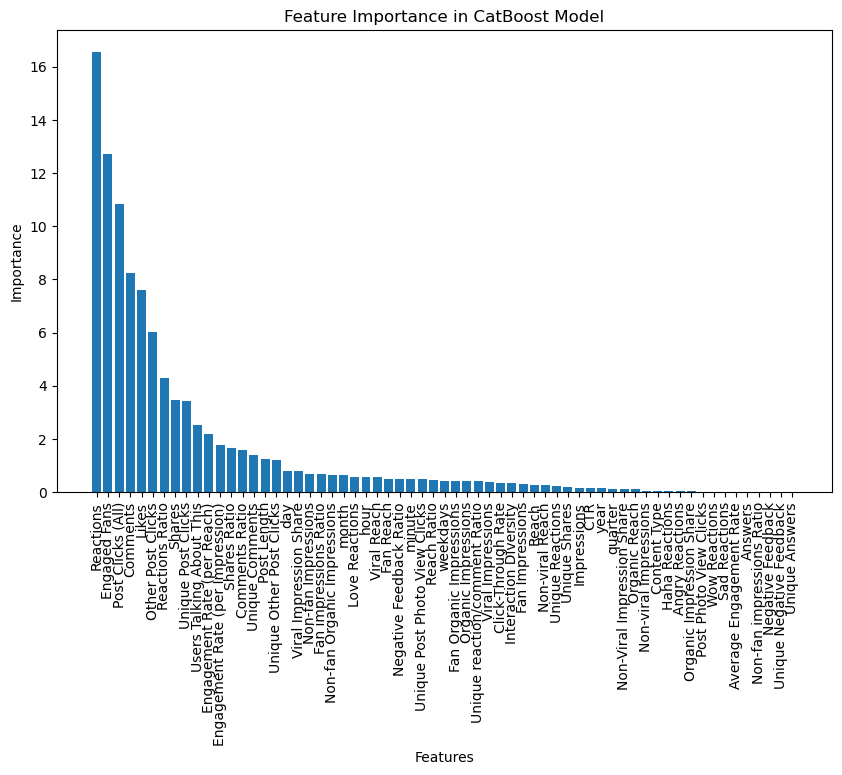

In [108]:
#feature importance
feature_importance = lr.get_feature_importance()
feature_names = X.columns

# Creating a DataFrame to store feature importance results
importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})

# Sorting the DataFrame by feature importance values
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.bar(importance_df['feature'], importance_df['importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in CatBoost Model')
plt.show()

### Engagement Rate Regression Prediction

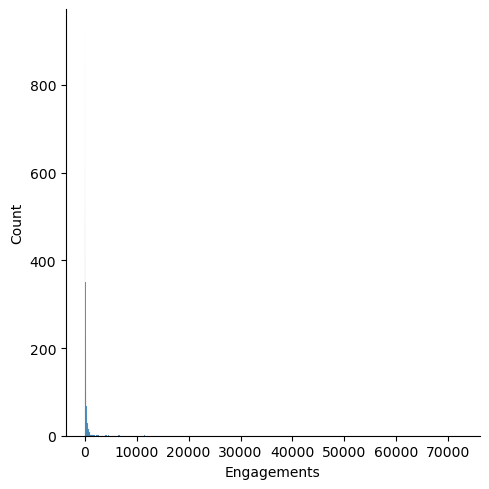

In [109]:
sns.displot(fb['Engagements']);

The above shows that the data is greatly right-skewed and its not going to be very ideal for the machine learning model. It has to be corrected

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


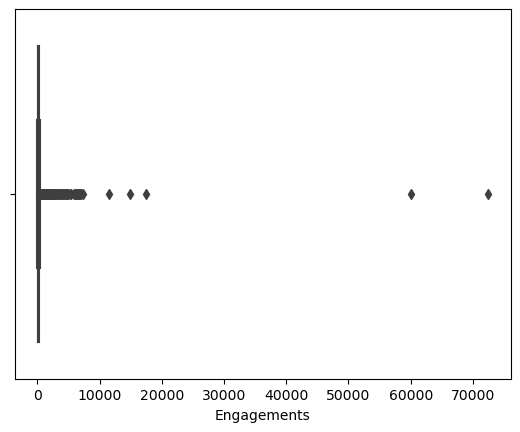

In [110]:
sns.boxplot(fb['Engagements']);

In [111]:
#dropping engagements less than 5000
fb = fb[fb['Engagements'] < 5000]

In [112]:
df_engage = fb.drop(columns = ['Date',	'Post ID',	'Network', 'Post Type','Profile',	'Sent by', 'Link', 'Post','Linked Content','Engagement Ratio','Engagements_Class', 'Engaged Users'])

In [113]:
le = LabelEncoder()

In [114]:
df_engage['Content Type'] = le.fit_transform(df_engage['Content Type'])

In [115]:
df_engage.head(5)

,Content Type,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Fan Impressions,Fan Organic Impressions,Non-fan Impressions,Non-fan Organic Impressions,Reach,Organic Reach,Viral Reach,Non-viral Reach,Fan Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Love Reactions,Haha Reactions,Wow Reactions,Sad Reactions,Angry Reactions,Comments,Shares,Click-Through Rate,Other Post Clicks,Post Clicks (All),Post Photo View Clicks,Answers,Negative Feedback,Engaged Fans,Users Talking About This,Unique Reactions,Unique Comments,Unique Shares,Unique Answers,Unique Post Clicks,Unique Post Photo View Clicks,Unique Other Post Clicks,Unique Negative Feedback,Post Length,year,quarter,month,day,hour,minute,weekdays,Reach Ratio,CTR,Reactions Ratio,Comments Ratio,Shares Ratio,Unique reaction/comment Ratio,Negative Feedback Ratio,Average Engagement Rate,Fan impressions Ratio,Non-fan impressions Ratio,Organic Impression Share,Viral Impression Share,Non-Viral Impression Share,Interaction Diversity
8892,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,812.0,132.0,132.0,0.0,0.0,0.0,0.0,0.0,670.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56,2013,4,11,26,20,16,1,0.0,0.0,0.162562,0.825123,0.012315,0.0,0.0,231.683234,0.0,0.0,0.0,0.0,0.0,0.0
8891,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138.0,54.0,54.0,0.0,0.0,0.0,0.0,0.0,80.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43,2013,4,11,29,19,15,4,0.0,0.0,0.391304,0.579710,0.028986,0.0,0.0,231.683234,0.0,0.0,0.0,0.0,0.0,0.0
8890,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115,2014,3,7,24,10,15,3,0.0,0.0,0.416667,0.583333,0.000000,0.0,0.0,231.683234,0.0,0.0,0.0,0.0,0.0,0.0
8889,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79,2014,3,8,5,16,55,1,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,231.683234,0.0,0.0,0.0,0.0,0.0,0.0
8888,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18,2014,4,10,31,10,12,4,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,231.683234,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
X,y = df_engage.drop('Engagements',axis = 1) , df_engage['Engagements']

In [117]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state = 42)

In [118]:
lr = CatBoostRegressor(random_state = 42, iterations = 200, verbose = False)

In [119]:
lr.fit(xtrain,ytrain)

In [120]:
pred = lr.predict(xtest)

In [121]:
mean_absolute_error(ytest,pred)

9.848405262502148

In [122]:
np.sqrt(mean_squared_error(ytest,pred))

38.96874869563436

From the mean absolute error and root means squared error, we can see that the scores are very fair.

For the modelling section,  a better model could be created upon speaking with the organizers of this competition to see their business needs. Knowing the business need can help to guide on creating a very robust model

In [124]:
os.makedirs('../../cleaned_datasets', exist_ok = True)
# os.makedirs(os.path.join(self.parent, 'datasets'), exist_ok=True)

In [125]:
fb.to_csv('../../cleaned_datasets/fb_cleaned.csv',index = False)